You can actually do a lot of interesting things -- not related to hyperbolic PDEs -- with the building blocks of PyClaw.  Let's see how.

To run this notebook, you'll first need to [install PyClaw](http://www.clawpack.org/pyclaw/started.html) if you haven't already.

In [1]:
%matplotlib inline
from clawpack import pyclaw
import numpy as np
import matplotlib.pyplot as plt

The `pyclaw.Geometry` module contains things of general use when dealing with structured grids in 1, 2, or 3 dimensions.  If you place the cursor at the end of the next cell and hit `<tab>`, you'll see what is included:

- Dimension
- Patch
- Grid
- Domain

In [3]:
pyclaw.geometry

<module 'clawpack.pyclaw.geometry' from '/Users/praveen/Applications/clawpack/pyclaw/src/pyclaw/geometry.py'>

# `pyclaw.Dimension`

The building block for all PyClaw geometry is the Dimension object.  The docstring explains most of what it can do.

In [4]:
print(pyclaw.Dimension.__doc__)


    Basic class representing a dimension of a Patch object

    :Initialization:

    Required arguments, in order:
     - *lower* - (float) Lower extent of dimension
     - *upper* - (float) Upper extent of dimension
     - *num_cells* - (int) Number of cells

    Optional (keyword) arguments:
     - *name* - (string) string Name of dimension
     - *units* - (string) Type of units, used for informational purposes only

    Output:
     - (:class:`Dimension`) - Initialized Dimension object

    Example:

    >>> from clawpack.pyclaw.geometry import Dimension
    >>> x = Dimension(0.,1.,100,name='x')
    >>> print(x)
    Dimension x:  (num_cells,delta,[lower,upper]) = (100,0.01,[0.0,1.0])
    >>> x.name
    'x'
    >>> x.num_cells
    100
    >>> x.delta
    0.01
    >>> x.nodes[0]
    0.0
    >>> x.nodes[1]
    0.01
    >>> x.nodes[-1]
    1.0
    >>> x.centers[-1]
    0.995
    >>> len(x.centers)
    100
    >>> len(x.nodes)
    101
    


Let's instantiate a `Dimension` object and see what we can do with it.

In [5]:
x = pyclaw.Dimension(0.,1.,10) # Dimension with 10 intervals in [0,1]

A Dimension object is essentially an equipartitioning of an interval.  The four arguments used to initialize it are, in order:

- A name
- The left end of the interval (`lower`)
- The right end of the interval (`upper`)
- The number of partitions, or cells (`n`)

Printing the Dimension object gives us essentially this information back:

In [6]:
print(x)
x.centers

Dimension x:  (num_cells,delta,[lower,upper]) = (10,0.1,[0.0,1.0])


array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

Notice that the printed statement also includes `delta`, the width of a single partition.  The Dimension knows a lot more.  For instance, it can tell us the locations of the cell centers:

In [7]:
print(x.centers)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


and of the cell edges (often referred to as *interfaces* in finite volume terminology):

In [8]:
print(x.nodes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


## Modifying a Dimension
The Dimension is an interactive object: if we change one of its properties, the others are updated automatically.  Here, we change the number of cells from 10 to 8 and the cell centers are automatically respaced.

In [9]:
x.num_cells=8
print(x)
x.centers

Dimension x:  (num_cells,delta,[lower,upper]) = (8,0.125,[0.0,1.0])


array([0.0625, 0.1875, 0.3125, 0.4375, 0.5625, 0.6875, 0.8125, 0.9375])

Similarly, we can change the boundary locations:

In [10]:
x.lower=-0.5
print(x)
x.centers

Dimension x:  (num_cells,delta,[lower,upper]) = (8,0.1875,[-0.5,1.0])


array([-0.40625, -0.21875, -0.03125,  0.15625,  0.34375,  0.53125,
        0.71875,  0.90625])

Using the cell and edge coordinates, we can easily plot a function that is defined piecewise over these intervals:

[0.66614361 0.80352257 0.96923323 1.16911845 1.41022603 1.7010573
 2.05186677 2.47502377]


/Users/praveen/Applications/clawpack/pyclaw/src/pyclaw/geometry.py:528: UserWarning: 'edges' has been deprecated; please use 'nodes' instead.
  warnings.warn(deprec_message)


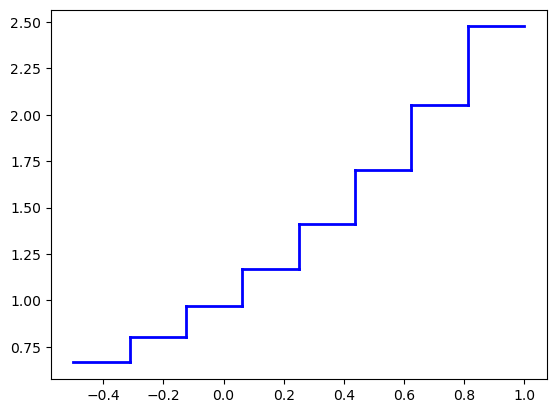

In [11]:
q = np.exp(x.centers)
print(q)
for i in range(x.num_cells):
    plt.plot([x.nodes[i],x.edges[i+1]],[q[i],q[i]],'b',lw=2)
    if i<x.num_cells-1:
        plt.plot([x.nodes[i+1],x.edges[i+1]],[q[i],q[i+1]],'b',lw=2)

# `pyclaw.Grid`

We can take one or more Dimension objects and form a `Grid` with them.  The Grid is just a partitioning of the tensor product of the Dimensions, where the partitioning is given by the tensor product of the Dimension intervals.  If that sounds complicated, just know that the grid can give us multidimensional coordinates, similar to the MATLAB or Numpy command `meshgrid`.

One-dimensional grids are not very interesting, so let's create a two-dimensional grid:

In [12]:
x = pyclaw.Dimension(-1.,1.,10,name='x')
y = pyclaw.Dimension(-1.,1.,10,name='y')
print(x)
print(y)

Dimension x:  (num_cells,delta,[lower,upper]) = (10,0.2,[-1.0,1.0])
Dimension y:  (num_cells,delta,[lower,upper]) = (10,0.2,[-1.0,1.0])


In [13]:
grid = pyclaw.geometry.Grid((x,y))
print(grid)

2-dimensional domain (x,y)
No mapping
Extent:  [-1.0, 1.0] x [-1.0, 1.0]
Cells:  10 x 10


The Grid is also fully interactive, so we can change its properties (or those of its constituent Dimensions) and all other properties automatically update.

In [14]:
x.num_cells = 12
x.upper = 3.
print(grid)

2-dimensional domain (x,y)
No mapping
Extent:  [-1.0, 3.0] x [-1.0, 1.0]
Cells:  12 x 10


We can get the coordinates of all the cell centers:

In [15]:
X, Y = grid.c_centers
print(Y)

[[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]]


We can plot the grid, optionally marking the locations of nodes and centers:

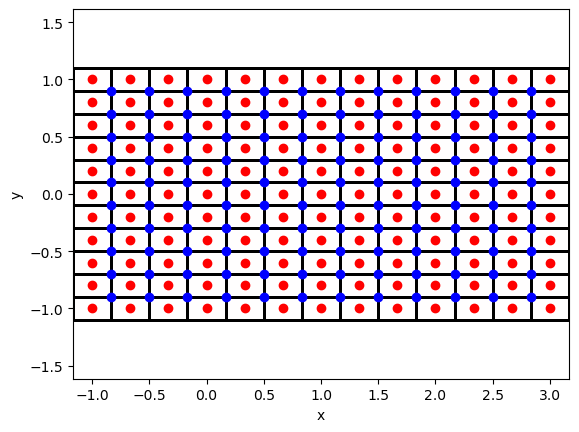

In [16]:
grid.plot(mark_nodes=True,mark_centers=True);

The plot above is simply drawing all the lines between adjacent nodes of the grid.

In numerical PDEs, we often use *ghost cells* around the edge of the grid to implement boundary conditions.  The `grid.plot` function knows about those too:

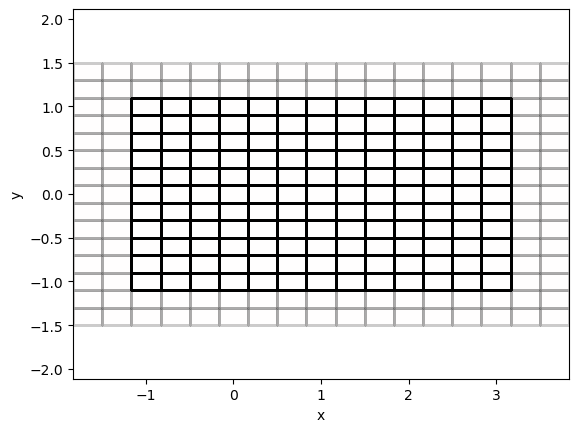

In [17]:
grid.plot(num_ghost=2);

# Mappings

PyClaw grids need not be rectangular.  We can define a grid over any region that results from a mapping of a rectangle.  For instance, here is a mapping that takes a square to a circle (from [the SIAM Review paper of Calhoun, Helzel, & LeVeque](http://faculty.washington.edu/rjl/pubs/circles/)):

In [18]:
def square2circle(xc,yc,r1=1.0):
    d = np.maximum(np.abs(xc),np.abs(yc))
    r = np.sqrt(xc**2 + yc**2)
    r = np.maximum(r, 1.e-10)
    xp = r1 * d * xc/r
    yp = r1 * d * yc/r
    return [xp, yp]

The `grid.mapc2p` function is the identity mapping by default.  Let's create a new grid and associate with it the circle mapping.

/Users/praveen/Applications/clawpack/pyclaw/src/pyclaw/geometry.py:442: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p = ax.pcolormesh(xe,ye,0*xe,edgecolors='k',cmap='bwr',alpha=0.2)
/Users/praveen/Applications/clawpack/pyclaw/src/pyclaw/geometry.py:450: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p = ax.pcolormesh(xe,ye,0*xe,edgecolors='k',cmap='bwr')


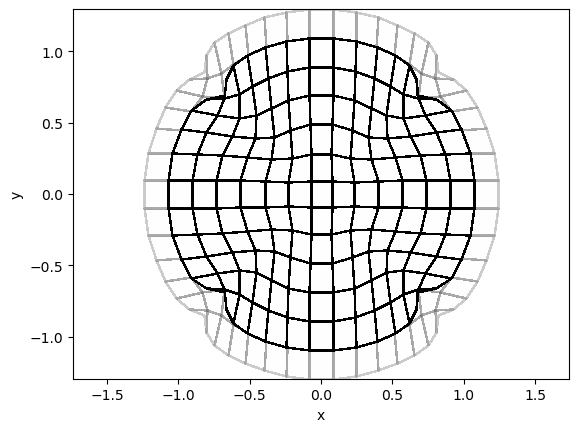

In [19]:
x.upper = 1.

grid.mapc2p = square2circle
grid.plot(num_ghost=1);